In [1]:
import csv
import networkx as nx
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
import random
import matplotlib.pyplot as plt

In [2]:
# prepare dataset

f = open('data/train.csv', 'r', encoding='utf-8')
reader = csv.reader(f)
trains = []
for line in reader:
    trains.append(line)
f.close()    
print("trains", len(trains))

f = open('data/node_ingredient.csv', 'r', encoding='utf-8')
reader = csv.reader(f)
node_ingredients = []
for line in reader:
    node_ingredients.append(line)
f.close()    
print("data/node_ingredients", len(node_ingredients))
num_ing = len(node_ingredients)

# f = open('validation_classification_question.csv', 'r', encoding='utf-8')
# reader = csv.reader(f)
# val_cls_q = []
# for line in reader:
#     val_cls_q.append(line)
# f.close()
# print("val_cls_q", len(val_cls_q))

# f = open('validation_classification_answer.csv', 'r', encoding='utf-8')
# reader = csv.reader(f)
# val_cls_a = []
# for line in reader:
#     val_cls_a.append(line)
# f.close()
# print("val_cls_a", len(val_cls_a))

f = open('data/validation_completion_question.csv', 'r', encoding='utf-8')
reader = csv.reader(f)
val_cpt_q = []
for line in reader:
    val_cpt_q.append(line)
f.close()
print("val_cpt_q", len(val_cpt_q))

f = open('data/validation_completion_answer.csv', 'r', encoding='utf-8')
reader = csv.reader(f)
val_cpt_a = []
for line in reader:
    val_cpt_a.append(line)
f.close()
print("val_cpt_a", len(val_cpt_a))

trains 23547
data/node_ingredients 6714
val_cpt_q 7848
val_cpt_a 7848


In [3]:
singles = defaultdict(int)
pairs = defaultdict(int)


for data in tqdm(trains):
    nodes = [int(node) for node in data[0:-1]]
    nodes = sorted(nodes)
    for i in range(len(nodes)):
        singles[nodes[i]] += 1
        
    for i in range(len(nodes) - 1):
        for j in range(i+1, len(nodes)):
            pairs[(nodes[i], nodes[j])] += 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23547/23547 [00:01<00:00, 18973.51it/s]


[(937, 10683), (5377, 4764), (5536, 4685), (2945, 4347), (6187, 4329), (1308, 3759), (2122, 3713), (2518, 2859), (5648, 2809), (4799, 2739)]


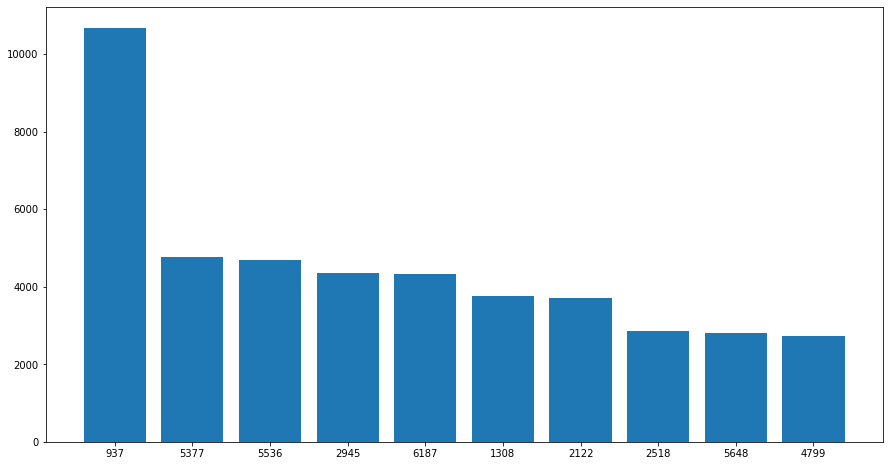

In [4]:
singles_top10 = sorted(singles.items(), key=lambda kv: kv[1], reverse=True)[:10]
print(singles_top10)
ingredients = [k for k,v in singles_top10]
freqs = [v for k,v in singles_top10]
x = np.arange(10)

plt.figure(figsize=(15,8))
plt.bar(x, freqs)
plt.xticks(x, ingredients)

plt.show()

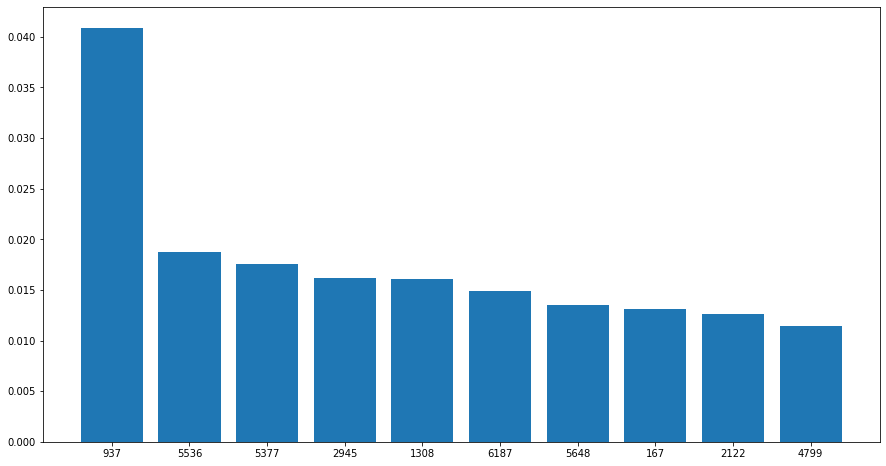

In [46]:
target_dict = defaultdict(int)
for data in val_cpt_a:
    target = data[0]
    target_dict[target] += 1
target_top10 = sorted(target_dict.items(), key=lambda kv: kv[1], reverse=True)[:10]

ingredients = [k for k,v in target_top10]
freqs = [v / len(val_cpt_a) for k,v in target_top10]
x = np.arange(10)

plt.figure(figsize=(15,8))
plt.bar(x, freqs)
plt.xticks(x, ingredients)

plt.show()

In [7]:
def plot_freq(file):
    f = open(file, 'r', encoding='utf-8')
    reader = csv.reader(f)
    results = []
    for line in reader:
        results.append(line)
    f.close()

    acc = 0
    result_dict = defaultdict(int)
    for i, data in enumerate(results):
        if data == val_cpt_a[i]:
            acc += 1
        result_dict[data[0]] += 1
    print("Accuracy: ", acc / len(val_cpt_a) * 100)
    result_top10 = sorted(result_dict.items(), key=lambda kv: kv[1], reverse=True)[:10]

    ingredients = [k for k,v in result_top10]
    freqs = [v / len(results) for k,v in result_top10]
    x = np.arange(10)

    plt.figure(figsize=(15,8))
    plt.bar(x, freqs)
    plt.xticks(x, ingredients)

    plt.show()

results 7848


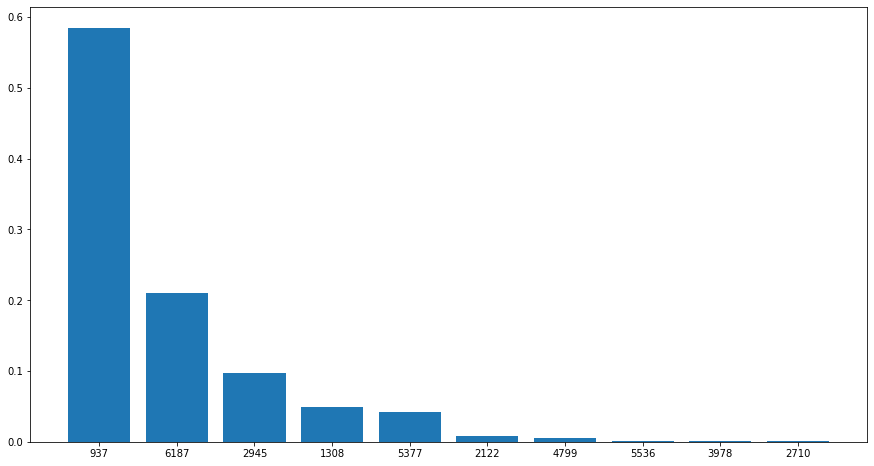

In [48]:
plot_freq('results/logistic_regression/val_svd128.csv')

results 7848


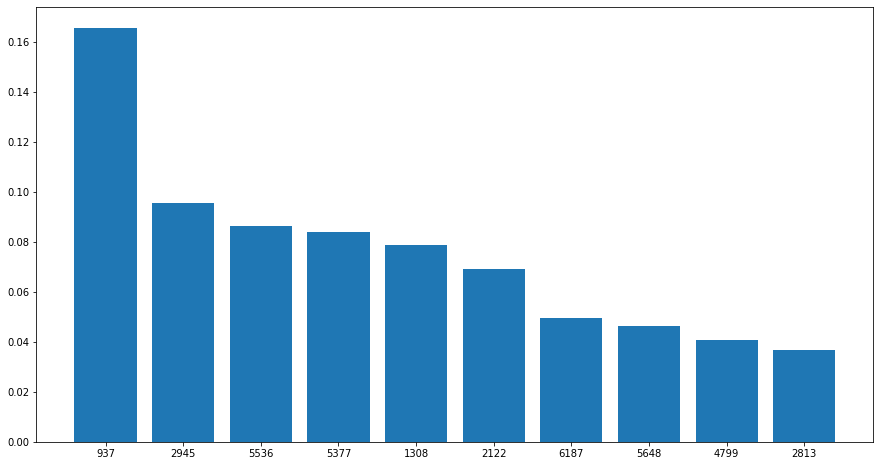

In [49]:
plot_freq('results/embedding_mlp/val_svd128.csv')

results 7848


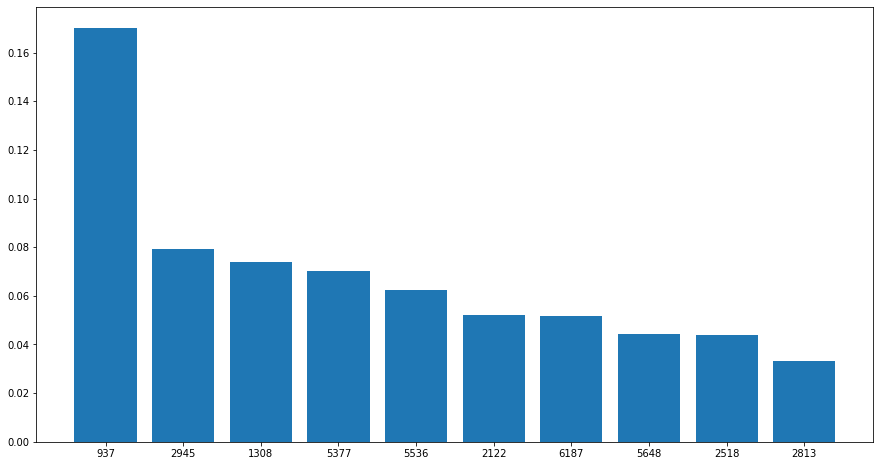

In [72]:
plot_freq('results/embedding_mlp/val_mysvd128.csv')

In [7]:
# frequent itemsets mining (naive)
acc = 0
num = 0
estimation_dict = defaultdict(int)
for i in range(8):
    f = open("results/" + str(i) + ".txt", 'r')
    for line in f.readlines():
        id, estimation, target = line.strip().split(',')
        num += 1
        estimation_dict[estimation] += 1
        if estimation == target:
            acc += 1
    f.close()
print("accuracy: ", acc / num * 100)
sorted(estimation_dict.items(), key=lambda kv: kv[1], reverse=True)

accuracy:  9.097859327217126


[('937', 3758),
 ('0', 416),
 ('5536', 407),
 ('5377', 362),
 ('3978', 312),
 ('6187', 287),
 ('2122', 235),
 ('1308', 178),
 ('2945', 164),
 ('4799', 159),
 ('2518', 80),
 ('2813', 64),
 ('4672', 60),
 ('5136', 57),
 ('1790', 57),
 ('5648', 54),
 ('167', 54),
 ('1679', 52),
 ('1476', 47),
 ('4266', 47),
 ('3097', 46),
 ('2809', 44),
 ('59', 37),
 ('5882', 34),
 ('5774', 34),
 ('4917', 27),
 ('1816', 26),
 ('1953', 26),
 ('6422', 19),
 ('4544', 19),
 ('4038', 17),
 ('1198', 17),
 ('1495', 17),
 ('3653', 17),
 ('2021', 13),
 ('1909', 13),
 ('2710', 12),
 ('773', 12),
 ('3202', 11),
 ('3146', 10),
 ('265', 10),
 ('3228', 10),
 ('6036', 9),
 ('5162', 9),
 ('916', 9),
 ('962', 9),
 ('5884', 9),
 ('3622', 8),
 ('332', 8),
 ('1435', 8),
 ('3514', 7),
 ('5204', 7),
 ('4543', 7),
 ('6276', 6),
 ('909', 6),
 ('2351', 6),
 ('203', 6),
 ('4649', 6),
 ('527', 6),
 ('3826', 6),
 ('3447', 6),
 ('58', 6),
 ('186', 6),
 ('530', 6),
 ('2061', 5),
 ('308', 5),
 ('579', 5),
 ('4677', 5),
 ('4335', 5),
 (

Accuracy:  11.072884811416921


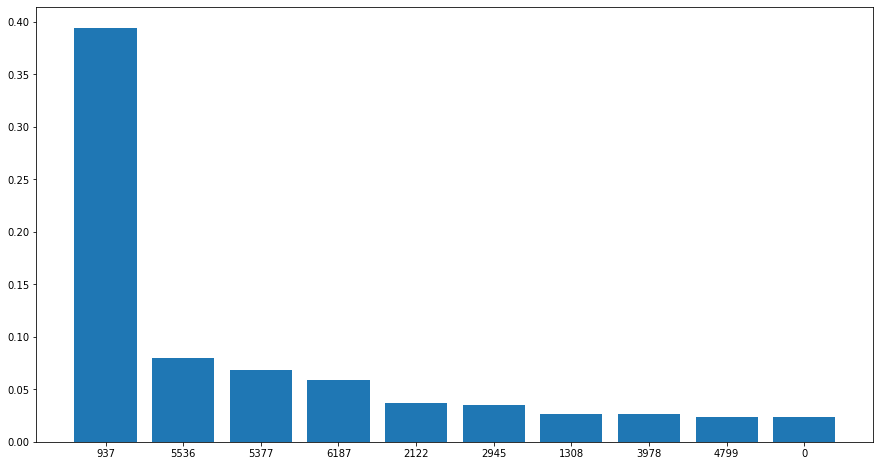

In [8]:
# efficient + consider question
plot_freq('results/frequent_items/val_total.csv')

In [18]:
# Nerual Network
estimation_dict = defaultdict(int)
f = open('results/svd128.csv', 'r', encoding='utf-8')
reader = csv.reader(f)
estimations = []
acc = 0
for line in reader:
    estimations.append(line[0])
f.close()

for i in range(len(val_cpt_a)):
    estimation_dict[estimations[i+1]] += 1
    if estimations[i+1] == val_cpt_a[i][0]:
        acc += 1
print("accuracy: ", acc / len(val_cpt_a) * 100)
sorted(estimation_dict.items(), key=lambda kv: kv[1], reverse=True)

accuracy:  10.626911314984708


[('937', 1546),
 ('2945', 718),
 ('5377', 687),
 ('1308', 643),
 ('5536', 593),
 ('6187', 482),
 ('2122', 473),
 ('5648', 407),
 ('2813', 337),
 ('3978', 298),
 ('4799', 283),
 ('167', 250),
 ('5136', 180),
 ('1816', 156),
 ('1679', 134),
 ('2710', 96),
 ('3514', 76),
 ('3097', 71),
 ('1909', 71),
 ('5204', 65),
 ('4544', 50),
 ('6422', 42),
 ('6126', 30),
 ('5119', 29),
 ('2956', 24),
 ('5884', 22),
 ('1396', 17),
 ('2437', 12),
 ('80', 10),
 ('992', 10),
 ('1198', 7),
 ('2464', 6),
 ('6429', 6),
 ('1329', 4),
 ('1819', 4),
 ('6215', 2),
 ('2060', 2),
 ('4917', 1),
 ('3071', 1),
 ('1454', 1),
 ('5932', 1),
 ('59', 1)]

In [15]:
estimations[7848]

'5536'

In [21]:
# sampling
estimation_dict = defaultdict(int)
acc = 0
f = open("results/sampling_6.txt", 'r')
for line in f.readlines():
    id, estimation, target = line.strip().split(',')
    num += 1
    estimation_dict[estimation] += 1
    if estimation == target:
        acc += 1
f.close()
print("accuracy: ", acc / len(val_cpt_a) * 100)
sorted(estimation_dict.items(), key=lambda kv: kv[1], reverse=True)

accuracy:  7.581549439347604


[('937', 2583),
 ('0', 526),
 ('5536', 520),
 ('5377', 450),
 ('6187', 375),
 ('2122', 298),
 ('3978', 234),
 ('1308', 219),
 ('4799', 207),
 ('2945', 181),
 ('2518', 123),
 ('5136', 87),
 ('5648', 76),
 ('167', 76),
 ('4672', 71),
 ('2813', 70),
 ('3097', 67),
 ('1679', 66),
 ('59', 63),
 ('1476', 60),
 ('1953', 58),
 ('2809', 50),
 ('5882', 47),
 ('4266', 46),
 ('5774', 39),
 ('3653', 37),
 ('6422', 37),
 ('4917', 37),
 ('1790', 33),
 ('1816', 31),
 ('2021', 30),
 ('1495', 27),
 ('1198', 25),
 ('2710', 24),
 ('4544', 22),
 ('6036', 20),
 ('4038', 20),
 ('5884', 19),
 ('3447', 18),
 ('3146', 18),
 ('265', 17),
 ('2351', 16),
 ('332', 15),
 ('3228', 15),
 ('5162', 15),
 ('1909', 15),
 ('962', 14),
 ('3622', 14),
 ('2442', 13),
 ('4677', 12),
 ('2564', 12),
 ('4543', 11),
 ('909', 11),
 ('4361', 11),
 ('1396', 10),
 ('203', 10),
 ('281', 10),
 ('773', 10),
 ('3514', 9),
 ('4945', 9),
 ('1435', 9),
 ('530', 9),
 ('6276', 8),
 ('2414', 8),
 ('916', 8),
 ('579', 8),
 ('469', 8),
 ('527', 8

In [22]:
# sampling
estimation_dict = defaultdict(int)
acc = 0
f = open("results/sampling_6_singles.txt", 'r')
for line in f.readlines():
    id, estimation, target = line.strip().split(',')
    num += 1
    estimation_dict[estimation] += 1
    if estimation == target:
        acc += 1
f.close()
print("accuracy: ", acc / len(val_cpt_a) * 100)
sorted(estimation_dict.items(), key=lambda kv: kv[1], reverse=True)

accuracy:  5.45361875637105


[('2', 531),
 ('3978', 231),
 ('5536', 169),
 ('4799', 154),
 ('5136', 152),
 ('4672', 146),
 ('3097', 132),
 ('5774', 116),
 ('4917', 112),
 ('5377', 108),
 ('6187', 98),
 ('2122', 93),
 ('2813', 84),
 ('6422', 82),
 ('1953', 82),
 ('1679', 81),
 ('5162', 79),
 ('4266', 76),
 ('2809', 75),
 ('2518', 73),
 ('1790', 67),
 ('1816', 62),
 ('2564', 62),
 ('5882', 58),
 ('1476', 57),
 ('4038', 56),
 ('937', 55),
 ('3514', 54),
 ('5648', 53),
 ('1308', 53),
 ('2442', 52),
 ('2710', 50),
 ('6036', 49),
 ('1435', 49),
 ('1137', 48),
 ('1198', 47),
 ('4639', 47),
 ('909', 44),
 ('332', 43),
 ('6429', 43),
 ('962', 42),
 ('2021', 40),
 ('3228', 39),
 ('3653', 36),
 ('6352', 36),
 ('2351', 36),
 ('3146', 36),
 ('3622', 35),
 ('3554', 35),
 ('1454', 35),
 ('1909', 34),
 ('4544', 34),
 ('265', 34),
 ('992', 33),
 ('4335', 33),
 ('4677', 31),
 ('1396', 30),
 ('167', 30),
 ('5510', 30),
 ('5908', 29),
 ('916', 29),
 ('59', 29),
 ('3725', 28),
 ('4945', 28),
 ('3447', 27),
 ('281', 26),
 ('6276', 26),

In [50]:
def make_embedding(filename, hiddensize):
    f = open(filename, 'r', encoding='utf-8')
    reader = csv.reader(f)
    f.readline()
    embedding = np.zeros((6714, hiddensize))
    for line in reader:
        i = int(line[1])
        j = 0
        for node in line[2][2:-1].split(' '):
            if node != '':
                embedding[i][j] = float(node.strip())
                j += 1

    f.close()
    return embedding

In [51]:
svd128 = make_embedding('Embedding/SVD128.csv', 128)

In [55]:
np.average(svd128)

0.018928702952075938

In [62]:
def load_embedding(filename):
    NUM_ING = 6714
    f = open(filename, 'r', encoding='utf-8')
    reader = csv.reader(f)
    lines = []
    for line in reader:
        lines.append(line)
    
    embedding_size = len(lines[0])
    embedding = np.zeros((NUM_ING, embedding_size))
    for i, line in enumerate(lines):
        for j, value in enumerate(line):
            embedding[i][j] = float(value)
    return embedding

In [63]:
svd128 = load_embedding('embeddings/svd128.csv')
np.average(svd128)

0.2636306095901136

In [59]:
x = np.arange(4)
x = np.reshape(x, (2,2))
print(x)
np.average(x)

[[0 1]
 [2 3]]


1.5

In [69]:
import networkx as nx

G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(2, 3, weight=2)
G.add_edge(3, 1, weight=3)

A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 3]
 [1 0 2]
 [3 2 0]]


In [86]:
filelist = [
    'results/embedding_mlp/val_svd128.csv',
    'results/embedding_mlp/val_mysvd128.csv',
    'results/embedding_mlp/val_mysvd256.csv',
    'results/embedding_mlp/val_mysvd512.csv',
]


estimations = []
for file in filelist:
    f = open(file, 'r')
    estimation = []
    for line in f.readlines():
        estimation.append(line.strip())
    estimations.append(estimation)
    f.close()


In [87]:
estimations[0]

['3978',
 '4799',
 '5648',
 '4799',
 '1816',
 '937',
 '4059',
 '937',
 '3978',
 '1308',
 '937',
 '5136',
 '2518',
 '3097',
 '937',
 '167',
 '937',
 '1308',
 '5136',
 '2122',
 '937',
 '2945',
 '1308',
 '1816',
 '2945',
 '3097',
 '2945',
 '5536',
 '2813',
 '6187',
 '5536',
 '2809',
 '167',
 '6126',
 '1396',
 '5377',
 '5648',
 '1816',
 '2518',
 '2945',
 '2122',
 '2122',
 '5648',
 '5536',
 '6187',
 '5648',
 '1308',
 '937',
 '1308',
 '5536',
 '5648',
 '5136',
 '5648',
 '937',
 '3097',
 '1308',
 '5377',
 '2813',
 '5536',
 '5648',
 '3978',
 '2813',
 '167',
 '5377',
 '2945',
 '2945',
 '5536',
 '5377',
 '2122',
 '2945',
 '2813',
 '5377',
 '937',
 '2945',
 '5536',
 '937',
 '1308',
 '5536',
 '5377',
 '937',
 '2518',
 '937',
 '5536',
 '2945',
 '937',
 '1308',
 '2813',
 '5136',
 '1816',
 '1308',
 '2945',
 '1308',
 '937',
 '937',
 '1308',
 '5536',
 '937',
 '2122',
 '2945',
 '5536',
 '3978',
 '3978',
 '5536',
 '937',
 '5377',
 '1308',
 '937',
 '167',
 '3978',
 '2518',
 '2122',
 '6187',
 '1308',
 '212

In [77]:
val_cpt_a[0]

['2061']

In [90]:
acc = [0] * len(estimations)
for i in range(len(val_cpt_a)):
    for j in range(len(estimations)):
        if estimations[j][i] == val_cpt_a[i][0]:
            acc[j] += 1
acc = [a / len(val_cpt_a) for a in acc]
print(acc)

[0.11060142711518858, 0.11557084607543323, 0.1210499490316004, 0.12627420998980632]


In [91]:
for i in range(len(val_cpt_a)):
    print(val_cpt_a[i][0], " // ", [est[i] for est in estimations])

2061  //  ['3978', '3978', '3978', '3978']
6421  //  ['4799', '1308', '1308', '1308']
2945  //  ['5648', '5648', '5648', '5648']
281  //  ['4799', '4799', '4799', '4799']
5119  //  ['1816', '5119', '5119', '5119']
5577  //  ['937', '937', '937', '5377']
4059  //  ['4059', '2945', '2518', '2945']
469  //  ['937', '3725', '4059', '3725']
1004  //  ['3978', '3978', '3978', '3978']
2032  //  ['1308', '332', '5884', '332']
4945  //  ['937', '937', '937', '937']
3826  //  ['5136', '4335', '332', '332']
3259  //  ['2518', '2518', '5884', '332']
937  //  ['3097', '59', '3097', '5884']
3915  //  ['937', '937', '937', '937']
1046  //  ['167', '5774', '937', '937']
2064  //  ['937', '937', '937', '937']
2945  //  ['1308', '4672', '4672', '2021']
1435  //  ['5136', '5136', '5136', '5136']
2122  //  ['2122', '2122', '2122', '2122']
3978  //  ['937', '59', '937', '937']
4543  //  ['2945', '2945', '2945', '2945']
1667  //  ['1308', '3978', '6187', '6187']
2174  //  ['1816', '3725', '1137', '2442']
29

1454  //  ['937', '167', '167', '2945']
4038  //  ['4799', '4799', '6422', '6422']
5511  //  ['5536', '5536', '5536', '5536']
2006  //  ['5377', '1198', '5377', '332']
2714  //  ['5536', '5536', '5536', '5536']
513  //  ['59', '5536', '5536', '167']
2809  //  ['2945', '2809', '2809', '2809']
5648  //  ['1679', '5377', '5648', '5648']
5377  //  ['5377', '5377', '5377', '5377']
3630  //  ['2809', '2809', '937', '937']
5648  //  ['2813', '2813', '2813', '2813']
3653  //  ['2945', '6187', '2945', '2122']
2997  //  ['167', '937', '937', '6422']
3146  //  ['2122', '2122', '2122', '6187']
937  //  ['5377', '4799', '1308', '1308']
4349  //  ['167', '167', '2945', '5648']
3152  //  ['1679', '1816', '2945', '5119']
59  //  ['937', '2122', '2122', '2122']
9  //  ['937', '1396', '1396', '1396']
1679  //  ['773', '1308', '4799', '4799']
2122  //  ['2122', '2122', '2122', '2122']
4270  //  ['2122', '2813', '2813', '2122']
278  //  ['5377', '5377', '5377', '5377']
6492  //  ['2945', '5774', '2710', '

4544  //  ['1308', '2945', '2021', '4677']
281  //  ['4799', '4799', '4799', '4799']
4349  //  ['2945', '4917', '4917', '4917']
2631  //  ['937', '937', '1308', '937']
6188  //  ['2122', '2945', '1953', '2122']
972  //  ['2945', '4917', '4917', '2710']
5648  //  ['167', '937', '937', '937']
4543  //  ['167', '2945', '1308', '5377']
3064  //  ['1308', '1953', '1953', '1953']
937  //  ['937', '937', '937', '937']
746  //  ['2122', '2122', '2122', '2122']
1308  //  ['2809', '937', '1308', '1308']
3060  //  ['2122', '6187', '6187', '2122']
4799  //  ['5377', '5377', '5377', '5377']
3144  //  ['937', '6187', '6187', '6187']
167  //  ['6187', '167', '2945', '5648']
3622  //  ['2945', '5136', '5136', '2945']
4672  //  ['2122', '2945', '2945', '6422']
552  //  ['6422', '2518', '2518', '6422']
4582  //  ['937', '937', '937', '937']
6187  //  ['3978', '3978', '1308', '3978']
5536  //  ['5536', '5536', '937', '937']
5536  //  ['5377', '5377', '5377', '5377']
2616  //  ['2945', '2710', '2710', '14

1390  //  ['2813', '59', '6187', '59']
3556  //  ['1396', '6711', '6711', '6711']
167  //  ['4799', '2945', '2945', '5884']
5377  //  ['5136', '5136', '5136', '5884']
4009  //  ['5536', '2945', '2945', '2945']
4622  //  ['5136', '2122', '2122', '5377']
1511  //  ['1679', '2945', '6187', '1476']
5536  //  ['5536', '5536', '5536', '5536']
3294  //  ['2122', '937', '167', '2122']
167  //  ['167', '5136', '5377', '5377']
1308  //  ['937', '1308', '1308', '937']
2375  //  ['937', '937', '5884', '5884']
4917  //  ['937', '2945', '937', '937']
4619  //  ['3978', '3978', '2518', '5884']
3622  //  ['5536', '5536', '5536', '5536']
3062  //  ['937', '937', '937', '5136']
1048  //  ['4799', '4799', '1679', '4799']
6116  //  ['2518', '2813', '2813', '2813']
6384  //  ['2122', '6187', '2122', '2122']
3371  //  ['1308', '1308', '1308', '1308']
4582  //  ['2809', '5536', '937', '937']
4799  //  ['937', '1308', '937', '167']
2471  //  ['4799', '4917', '4917', '4917']
193  //  ['5377', '5377', '5377', '

4632  //  ['2122', '937', '937', '4677']
3833  //  ['2945', '3514', '3514', '3514']
4319  //  ['6422', '2813', '2813', '2813']
1198  //  ['5536', '3097', '3097', '3097']
6482  //  ['1679', '1679', '5377', '6422']
2900  //  ['937', '3978', '3978', '4677']
1137  //  ['2945', '5377', '5377', '3514']
4009  //  ['937', '937', '1198', '1198']
3447  //  ['3978', '5536', '1308', '59']
4374  //  ['2945', '4799', '5648', '1476']
3562  //  ['167', '167', '167', '167']
6707  //  ['5536', '5536', '5536', '2809']
6429  //  ['2945', '2945', '2945', '2945']
2164  //  ['2945', '4038', '4038', '4038']
2518  //  ['2518', '2813', '2813', '2518']
59  //  ['5536', '4799', '4799', '4799']
5536  //  ['5536', '2945', '2945', '2945']
807  //  ['1308', '4799', '4799', '4799']
6596  //  ['3978', '3978', '3978', '3978']
154  //  ['5377', '5377', '5884', '2809']
4289  //  ['937', '2710', '2710', '1476']
4048  //  ['4799', '4799', '4799', '4799']
3597  //  ['4799', '6187', '6187', '1308']
1869  //  ['5536', '1308', 

6473  //  ['167', '1308', '1308', '167']
2375  //  ['5136', '2518', '5136', '1198']
4266  //  ['5884', '937', '962', '937']
4091  //  ['5377', '2813', '5377', '3725']
59  //  ['937', '937', '937', '937']
2813  //  ['5536', '2813', '2813', '1308']
3332  //  ['2122', '5377', '1308', '1308']
4204  //  ['937', '937', '937', '937']
6502  //  ['6126', '6187', '6187', '6422']
1816  //  ['5377', '2813', '2813', '2813']
937  //  ['937', '937', '937', '937']
5884  //  ['6126', '332', '5884', '5884']
4317  //  ['5536', '5536', '5536', '1308']
3467  //  ['2813', '2945', '2945', '1476']
1298  //  ['5377', '1816', '5377', '5377']
6248  //  ['5648', '5648', '5648', '5648']
937  //  ['937', '5536', '937', '937']
2122  //  ['2122', '2122', '6187', '2122']
5489  //  ['2122', '2122', '2122', '2122']
5788  //  ['2945', '2945', '2945', '2945']
4617  //  ['5536', '1308', '5536', '1308']
3228  //  ['5648', '2710', '4917', '4917']
2518  //  ['2813', '2813', '2813', '2813']
937  //  ['5536', '2518', '937', '55

5983  //  ['1308', '1308', '1308', '1308']
2885  //  ['1198', '4677', '1396', '5510']
3202  //  ['773', '3978', '3978', '3978']
4917  //  ['1308', '4917', '4917', '1308']
59  //  ['2122', '2122', '962', '962']
3365  //  ['2945', '4672', '4672', '4672']
2061  //  ['3978', '3978', '3978', '3978']
1679  //  ['5377', '1679', '5377', '5377']
3447  //  ['2945', '3978', '3978', '2945']
2945  //  ['2945', '2518', '2208', '2442']
1308  //  ['4799', '5774', '1308', '1308']
5536  //  ['2518', '2518', '5536', '5536']
4631  //  ['2945', '2945', '4544', '2945']
2122  //  ['5648', '5648', '5377', '4799']
1043  //  ['2122', '2122', '2122', '2945']
5636  //  ['5536', '5536', '3097', '3097']
5195  //  ['59', '5536', '992', '3097']
3343  //  ['5536', '5119', '5536', '5536']
3144  //  ['2518', '2518', '2518', '2518']
937  //  ['937', '937', '937', '937']
2945  //  ['1308', '1308', '1308', '1308']
2122  //  ['2122', '2122', '2122', '2122']
1693  //  ['3097', '6276', '6422', '6276']
5648  //  ['5648', '5648

In [95]:
num = 0
for i in range(len(val_cpt_a)):
    if estimations[0][i] in val_cpt_q[i]:
        print(i, val_cpt_q[i], estimations[0][i])
        num += 1
print("number: ", num)

275 ['807', '916', '1435', '2122', '2464', '2835', '3228', '3429', '3826', '4380', '4632', '4677', '5162', '5536', '5585', '5986', '6294', '6710'] 1435
356 ['59', '63', '1495', '2021', '2805', '2945', '3725', '3777', '3978', '4060', '4672', '4677', '4945', '5408', '5536', '5860', '6187', '6422', '6443', '6514'] 5536
444 ['167', '332', '579', '937', '962', '992', '1495', '2351', '2464', '2759', '3097', '3144', '3735', '4207', '4266', '4361', '4557', '5136', '5204', '5249'] 5136
636 ['167', '937', '1381', '2122', '2374', '2813', '3403', '4091', '4216', '4317', '4799', '4945', '5064', '5379', '5788', '6036', '6713'] 4799
656 ['714', '1308', '1679', '1942', '1953', '2616', '2945', '3131', '3371', '3622', '4561', '4565', '4649', '4827', '4982', '5052', '5720'] 1308
1115 ['80', '203', '1482', '2414', '2518', '2651', '3371', '3614', '3904', '3978', '4544', '4887', '5592', '5771', '6187'] 3978
1319 ['59', '203', '332', '992', '1198', '1396', '1448', '1495', '2518', '2945', '3097', '3125', '320

In [96]:
66 / len(val_cpt_a) * 100

0.8409785932721712

In [101]:
for data in trains[:10]:
    print([node_ingredients[int(node)][0] for node in data[:-1]])

['pepper', 'purple onion', 'grape tomatoes', 'feta cheese crumbles', 'garbanzo beans', 'seasoning', 'black olives', 'romaine lettuce', 'garlic']
['grilled chicken breasts', 'salt', 'eggs', 'cooking oil', 'garlic powder', 'pepper', 'chicken livers', 'green chilies', 'mayonaise', 'soy sauce', 'yellow onion', 'butter']
['vegetable oil', 'salt', 'wheat', 'water']
['passata', 'bay leaf', 'salt', 'cayenne pepper', 'black pepper', 'boneless chicken skinless thigh', 'cornflour', 'garlic paste', 'milk', 'water', 'chili powder', 'shallots', 'double cream', 'oil', 'ground cumin', 'garam masala', 'onions', 'butter', 'natural yogurt', 'lemon juice']
['plain flour', 'salt', 'sugar', 'eggs', 'powdered sugar', 'fresh ginger root', 'milk', 'ground ginger', 'ground cinnamon', 'baking powder', 'butter', 'vanilla extract']
['skirt steak', 'chorizo sausage', 'sea salt', 'bay leaf', 'salt', 'jalapeno chilies', 'white vinegar', 'medium shrimp', 'pepper', 'olive oil', 'chopped cilantro', 'garlic', 'flat leaf 